# Generating dataset 
This notebook shows how to generate the train and test set for the multimnist and multimnist_cluttered tasks

In [2]:
%matplotlib inline 
import matplotlib.pyplot as plt

import torch
import torchvision.transforms as T
from torchvision import datasets
import copy
import os
from tqdm.notebook import tqdm
import numpy as np 
np.set_printoptions(suppress=True)

import random

# Mnist for reconstruction (HF and LF)
In this task, the model has to reconstruct HF and LF image
- original mnist training dataset: 60k, 10k for testing

In [3]:
# pass filters
# https://github.com/ShivamSoni24/Butterworth-and-Gaussian-Filters/blob/main/Butterworth_and_Gaussian_filter.py
from scipy.fft import fft2, ifft2

#function for creating the filter with image dimensions
def creating_filter(img_array):
    
    dimensions = img_array.shape

    #Copying the image dimensions for the filter
    filter_height = dimensions[0]
    filter_width = dimensions[1]

    #finding fourier transform of the image using fft2 function of scipy
    fourier_transform = fft2(img_array)
    #round_function = lambda x: round(x,2)
    #fourier_transform_rounded = [list(map(round_function, i)) for i in fourier_transform]
    #print(fourier_transform)

    #Making fix order
    #n = order
    #Cut-off frequency value
    #D0 = cutoff

    #Designing the filter
    u = np.arange(0,filter_height)
    v = np.arange(0,filter_width)
    #print(u,v)

    #converting u array with values (filter_height/2, -filter_height/2)
    idx = []
    for i in u:
        if(i> (filter_height/2)):
            idx.append(i)
    #print(u[idx])
    #print(idx)
    u[idx] = (u[idx] - filter_height)
    #print(u)

    #converting v array with values (filter_width/2, -filter_width/2)
    idy = []
    for i in v:
        if(i > (filter_width/2)):
            idy.append(i)
    v[idy] = (v[idy] - filter_width)

    #print(v[idy])
    #print(idy)
    #print(v)
    #converting list to numpy array
    u = np.array(u)
    v = np.array(v)
    #print(u,v)

    #meshgrid is function that returns coordinates of v and u. List V with each row is a copy of v and list U with each column is a copy of u 
    U, V = np.meshgrid(v,u)
    #print(U.shape, V.shape)
    #print(U)
    #returning the filter and original image array
    return U, V, fourier_transform

#function that performs butterworth highpass function
def butterworth_highpass_function(img_array,order=3,cutoff=10):

    #creating filter for the function
    U, V, fourier_transform = creating_filter(img_array)

    #Making fix order
    n = order
    #Cut-off frequency value
    D0 = cutoff

    #Euclidean distance
    D = np.sqrt(U**2 + V**2)

    #Determining filtering mask
    H = (1/(1 + (D0/D)**(2*n)))

    #Convolution between the Fourier Transformed image and the mask
    G = H * fourier_transform

    #finding inverse fourier transform of the image using ifft2 function of scipy
    output_image_array = ifft2(G)
    #separating real part from complex numbers
    output_image_array_real = output_image_array.real
    #print(output_image_array_real.shape)

    #plotting original image and transformed image
    n=str(n)
    D0=str(D0)
    name = str("BHPF with n="+n+" Cut-off frequency="+D0)
    """plot(input_image_gs_array,"Orignal Image")
    plot(output_image_array_real,name)
    plt.show()"""

    return output_image_array_real, name

#function that performs butterworth lowpass function
def butterworth_lowpass_function(img_array,order=3,cutoff=10):

    #creating filter for the function
    U, V, fourier_transform = creating_filter(img_array)

    #Making fix order
    n = order
    #Cut-off frequency value
    D0 = cutoff

    #Euclidean distance
    D = np.sqrt((U**2 + V**2))

    #Determining filtering mask
    H = (1/(1 + (D/D0)**(2*n)))
    #converting high pass to low pass
    #HL=1-H

    #Convolution between the Fourier Transformed image and the mask
    G = H * fourier_transform

    #finding inverse fourier transform of the image using ifft2 function of scipy
    output_image_array = ifft2(G)
    #separating real part from complex numbers
    output_image_array_real = output_image_array.real
    #print(output_image_array_real.shape)

    #plotting original image and transformed image
    n=str(n)
    D0=str(D0)
    name = str("BLPF with n="+n+" Cut-off frequency="+D0)
    """plot(input_image_gs_array,"Orignal Image")
    plot(output_image_array_real,name)
    plt.show()"""

    return output_image_array_real, name


#function to perform lowpass gaussian function
def gaussian_lowpass_function(img_array,cutoff=10):
    
    #creating filter for the function
    U, V, fourier_transform = creating_filter(img_array)
    
    #Cut-off frequency value
    D0 = cutoff

    #Euclidean distance
    D = (U**2 + V**2)
    D = -(D/(2*(D0**2)))
    H = np.exp(D)

    #Convolution between the Fourier Transformed image and the mask
    G = H * fourier_transform

    #finding inverse fourier transform of the image using ifft2 function of scipy
    output_image_array = ifft2(G)
    #separating real part from complex numbers
    output_image_array_real = output_image_array.real
    #print(output_image_array_real.shape)


    #plotting original image and transformed image
    D0=str(D0)
    name = str("Gaussian Lowpass Filter with Cut-off frequency="+D0)
    """plot(input_image_gs_array,"Orignal Image")
    plot(output_image_array_real,name)
    plt.show()"""
    return output_image_array_real, name

#function to peerform gaussian highpass filter
def gaussian_highpass_function(img_array,cutoff=10):
    
    #creating filter for the function
    U, V, fourier_transform = creating_filter(img_array)
    
    #Cut-off frequency value
    D0 = cutoff

    #Euclidean distance
    D = (U**2 + V**2)
    D = -(D/(2*(D0**2)))
    H = np.exp(D)
    #converting lowpass to highpass
    HP = 1 - H

    #Convolution between the Fourier Transformed image and the mask
    G = HP * fourier_transform

    #finding inverse fourier transform of the image using ifft2 function of scipy
    output_image_array = ifft2(G)
    #separating real part from complex numbers
    output_image_array_real = output_image_array.real
    #print(output_image_array_real.shape)
    

    #plotting original image and transformed image
    D0=str(D0)
    name = str("Gaussian Highpass Filter with Cut-off frequency="+D0)
    """plot(input_image_gs_array,"Orignal Image")
    plot(output_image_array_real,name)
    plt.show()"""
    return output_image_array_real, name


In [61]:
## creating tensorized dataset helper functions
from skimage import transform, feature

def get_tensorized_dataset(im_set, ftype=None):
    images = []
    filtered =[]
    labels = []
    for img, label in im_set:
#         import pdb; pdb.set_trace()
        img = np.array(img)
        if ftype == 'lowpass':
            f, title = gaussian_lowpass_function(img, cutoff=6)
    #         f, title = butterworth_lowpass_function(img, order=5, cutoff=8)

        elif ftype == 'highpass':
            f, title = gaussian_highpass_function(img, cutoff=30)
    #         f, title = butterworth_highpass_function(img, order=5, cutoff=20)
        else: 
            print('set filter type!')
        
        # contrast normalization
        f_norm = f.astype(np.uint8)
#         f_norm = (255*(f - np.min(f)) / (np.max(f) - np.min(f))).astype(np.uint8)

        # append
        images.append(img)
        filtered.append(f_norm) 
        labels.append(label)
        
    # convert to tensor and one-hot vector
    transform_tohot = T.Lambda(lambda y: torch.zeros(10, dtype=torch.float).scatter_(0, torch.tensor(y), value=1))
    images_tensorized = torch.stack([T.ToTensor()(im) for im in images])
    filtered_tensorized = torch.stack([T.ToTensor()(im) for im in filtered])
    labels_tensorized = torch.stack([transform_tohot(label) for label in labels])
    
    return images_tensorized, filtered_tensorized, labels_tensorized

def plot(imgs, num_rows = 1, with_orig=False, row_title=None, cmap='gray', **imshow_kwargs):
#     if not isinstance(imgs, list):
#         raise ValueError('input images should be list form')

    num_cols = int(len(imgs)/num_rows) + (len(imgs)%num_rows > 0)
    fig, axs = plt.subplots(nrows=num_rows, ncols=num_cols, squeeze=False)
#     import pdb; pdb.set_trace()
    for row_idx in range(num_rows):
        for col_idx, img in enumerate(imgs[row_idx*num_cols:(row_idx+1)*num_cols]):
            ax = axs[row_idx, col_idx]
            ax.imshow(np.asarray(img), cmap=cmap, vmin=0, vmax=1,  **imshow_kwargs)
            ax.set(xticklabels=[], yticklabels=[], xticks=[], yticks=[])

#     if with_orig:
#         axs[0, 0].set(title='Original image')
#         axs[0, 0].title.set_size(8)
    if row_title is not None:
        for row_idx in range(num_rows):
            axs[row_idx, 0].set(ylabel=row_title[row_idx])
    plt.show()
#     plt.tight_layout()

# load original mnist
path_save = '../data/MNIST_recon'
dataset_type = 'test'
filter_type = 'lowpass' #lowpass

if dataset_type == 'train':
    im_set = datasets.MNIST('../data/',train=True, download=False)
elif dataset_type == 'test':
    im_set = datasets.MNIST('../data/',train=False, download=False)

orig_images_tensorized, filtered_images_tensorized, orig_labels_tensorized = get_tensorized_dataset(im_set, filter_type)
print(orig_images_tensorized.size())
print(filtered_images_tensorized.size())
print(orig_labels_tensorized.size())

torch.Size([10000, 1, 28, 28])
torch.Size([10000, 1, 28, 28])
torch.Size([10000, 10])


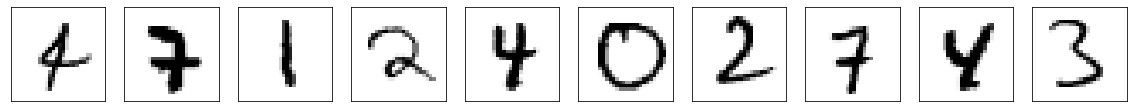

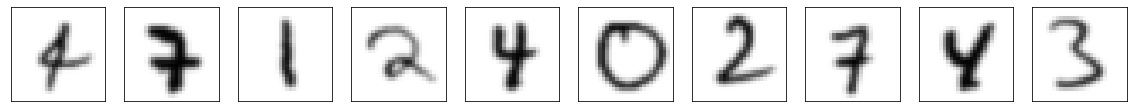

[tensor(4), tensor(7), tensor(1), tensor(2), tensor(4), tensor(0), tensor(2), tensor(7), tensor(4), tensor(3)]


In [62]:
# visualize images
plt.rcParams["figure.figsize"] = (20,3)
i = 30# 90 #152
plottedimgs = [torch.movedim(orig_images_tensorized[i], 0 ,-1) for i in range(10*i,10*(i+1))]
plot(plottedimgs, num_rows=1, cmap='gray_r')

plottedimgs = [torch.movedim(filtered_images_tensorized[i], 0 ,-1) for i in range(10*i,10*(i+1))]
plot(plottedimgs, num_rows=1, cmap='gray_r')

print([l.argmax() for l in orig_labels_tensorized[10*i:10*(i+1)]])

In [63]:
# save tensors 
filename = os.path.join(path_save, f'{dataset_type}_gaussian_{filter_type}.pt')
torch.save((orig_images_tensorized, filtered_images_tensorized, orig_labels_tensorized), filename)
print(f'{filename} saved to disk')

../data/MNIST_recon/test_gaussian_lowpass.pt saved to disk
